In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy import optimize as op
# Use loadmat to load matlab files
mat = loadmat("ex3data1.mat")
X = mat["X"]
y = mat["y"]

In [2]:
print(X.shape)
print(y.shape)

(5000, 400)
(5000, 1)


In [3]:
m = X.shape[0]

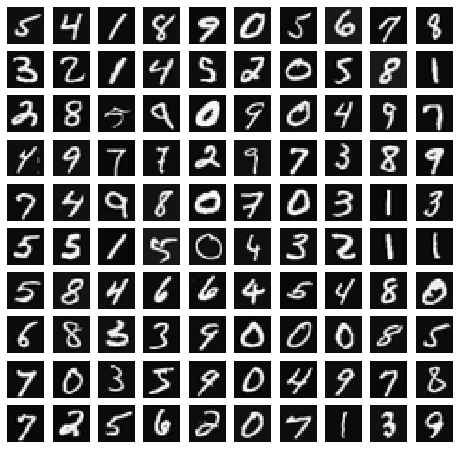

In [4]:
import random
import matplotlib.image as mpimg

fig, axis = plt.subplots(10,10,figsize=(8,8))

for i in range(10):
    for j in range(10):
        axis[i,j].imshow(X[random.randint(0,m),:].reshape(20,20,order="F"), cmap="gray")
        axis[i,j].axis("off")

### Sigmoid

In [5]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

### Cost for a step and one step gradient function

In [6]:
def lr_cost_func(theta, X, y, lambda_):
    m = len(X)
    h = sigmoid(np.dot(X, theta))
    J = 1/m * (np.dot((-y).T, np.log(h)) - np.dot((1-y).T, np.log(1-h)))
    J = J + lambda_/(2*m) * sum(theta[1:]**2)
    
    grad_0 = 1/m * np.dot((h-y).T, X[:,0])
    grad_else = 1/m * np.dot(X[:,1:].T, (h-y)) + lambda_/m * theta[1:]
    
    grad = np.vstack((grad_0, grad_else))
    return np.ndarray.flatten(J), grad

### Test case

In [7]:
theta_t = np.array([-2,-1,1,2]).reshape(4,1)
X_t = np.hstack([np.ones((5,1)), np.linspace(0.1,1.5,15).reshape(3,5).T])
y_t = np.array([1,0,1,0,1]).reshape(5,1)
lambda_t = 3;

In [8]:
J, grad = lr_cost_func(theta_t, X_t, y_t, lambda_t)

print(J, grad)

[2.5348194] [[ 0.14656137]
 [-0.54855841]
 [ 0.72472227]
 [ 1.39800296]]


### One-vs-all training

In [9]:
def gradient_descent(X, y, theta, alpha, num_iters, lambda_):
    m = len(y)
    J_history = []
    for i in range(num_iters):
        J, grad = lr_cost_func(theta, X, y, lambda_)
        theta = theta - (alpha * grad)
        J_history.append(J)
    
    return theta, J_history

In [10]:
def one_vs_all(X, y, num_labels, lambda_):
    m, n = X.shape
    X = np.hstack([np.ones((m, 1)), X])
    
    all_theta = []
    all_J = []
    
    initial_theta = np.zeros((n + 1, 1))
    alpha = 1
    num_iters = 300
    
    for c in range(num_labels + 1):
        theta, J_history = gradient_descent(X, np.where(y==c,1,0), initial_theta, alpha, num_iters, lambda_)
        all_theta.append(theta)
        all_J.append(J_history)
        
    # check gradient descent works properly
    plt.plot(range(0,num_iters), all_J[0])
    plt.xlabel('Number of iterations')
    plt.ylabel('Cost function J')
    plt.show()
    
    return all_theta, all_J

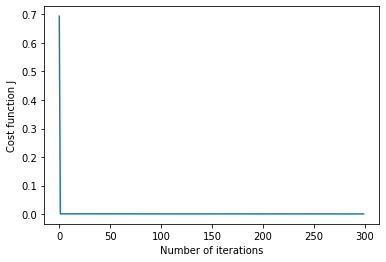

In [11]:
lambda_ = 1
num_labels = 10
all_theta, all_J = one_vs_all(X, y, num_labels, lambda_)

In [12]:
all_theta = np.squeeze(np.array(all_theta))
all_J = np.squeeze(np.array(all_J))
print(all_theta.shape, all_J.shape)

(11, 401) (11, 300)


### Predict for one-vs-all

In [13]:
def predict_one_vs_all(all_theta, X):
    m = X.shape[0]
    X = np.hstack([np.ones((m,1)), X])
    p = np.zeros((m,1))
    
    temp = sigmoid(np.dot(X, all_theta.T)) # 5000x10
    
    for i in range(m):
        p[i] = temp[i].argmax()
        
    return p

In [14]:
pred = predict_one_vs_all(all_theta, X)

In [15]:
print(np.mean(pred == y) * 100)

91.42
